# Feed-Forward Neural Network

In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from create_submission import create_csv_submission
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import keras
import matplotlib.pyplot as plt
import Dataset as data
from gensim.models import Word2Vec
from Word2VecModel import Word2VecModel
from nltk.corpus import stopwords
from Dataset import DataSet

/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/gunesyurdakul/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
word2vec = Word2VecModel(vector_size=128, word_min_count=5)
word2vec.load_model('model_word2vec_128.bin')
dataset = DataSet(word2vec)

In [6]:
deleted_substr = ['#', '<user>', '<url>']
dataset.create_train_test('../data/train_pos_full.txt', '../data/train_neg_full.txt', delete_substr=deleted_substr,\
                         training=True, weight=0, stop_words=False)

Total lines (label = True): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 

570000 lines processed  len words 10   10
580000 lines processed  len words 2   2
590000 lines processed  len words 3   3
600000 lines processed  len words 5   5
610000 lines processed  len words 13   13
620000 lines processed  len words 4   4
630000 lines processed  len words 4   3
640000 lines processed  len words 2   2
650000 lines processed  len words 4   3
660000 lines processed  len words 26   26
670000 lines processed  len words 5   5
680000 lines processed  len words 30   29
690000 lines processed  len words 7   7
700000 lines processed  len words 16   16
710000 lines processed  len words 2   2
720000 lines processed  len words 23   23
730000 lines processed  len words 11   11
740000 lines processed  len words 14   14
750000 lines processed  len words 9   9
760000 lines processed  len words 14   14
770000 lines processed  len words 12   12
780000 lines processed  len words 18   18
790000 lines processed  len words 8   8
800000 lines processed  len words 18   18
810000 lines pro

In [8]:
stopWords = set(stopwords.words('english'))
model.wv.vocab['pig'].count
#'true' in stopWords

AttributeError: 'Sequential' object has no attribute 'wv'

In [8]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

(2499130, 128)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [8]:
print(X_train.shape)
print(X_valid.shape)

(1999304, 128)
(499826, 128)


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

In [126]:
np.random.seed(23)

In [127]:
model = Sequential()
model.add(Dense(128, input_dim=80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
model.fit(X_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.4071 - acc: 0.8039
Epoch 2/15
1999304/1999304 [==============================] - 41s 21us/step - loss: 0.3880 - acc: 0.8153
Epoch 3/15
1999304/1999304 [==============================] - 41s 21us/step - loss: 0.3820 - acc: 0.8186
Epoch 4/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3785 - acc: 0.8206
Epoch 5/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3760 - acc: 0.8221
Epoch 6/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3740 - acc: 0.8233
Epoch 7/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3725 - acc: 0.8242
Epoch 8/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3713 - acc: 0.8248
Epoch 9/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3702 - acc: 0.8254
Epoch 10/15
1999304/1999304 [==========================

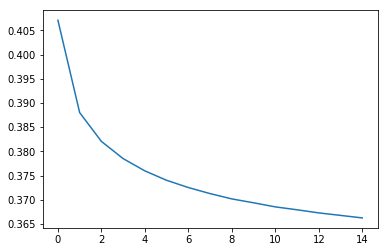

In [130]:
plt.plot(model.history.epoch, model.history.history['loss'])

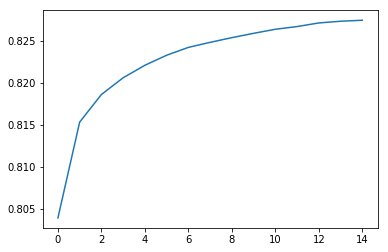

In [131]:
plt.plot(model.history.epoch, model.history.history['acc'])

In [132]:
model.evaluate(X_valid, y_valid)

499826/499826 [==============================] - 14s 28us/step


[0.37662492663271996, 0.8217699759509156]

***

# Word2Vec size = 100

In [10]:
from Word2VecModel import Word2VecModel

In [11]:
model_100 = Word2VecModel(128,5)
model_100.load_dataset('dataset.pkl')

In [32]:
model_100.train()

Training starts
Training ends
Word2Vec Model saved


In [33]:
from Dataset import DataSet

In [34]:
dataset = DataSet(model_100)

In [35]:
deleted_substr = ['#', '<user>', '<url>']

dataset.create_train_test('../data/train_pos_full.txt', '../data/train_neg_full.txt', 
                          delete_substr=deleted_substr, 
                          training=True)

Total lines (label = 1): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 lin

In [30]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_valid.shape)

(2495562, 128)
(1996449, 128)
(499113, 128)


## 

In [190]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
np.random.seed(23)

model1 = Sequential()
model1.add(Dense(256, input_dim=128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [191]:
model1.fit(X_train, y_train, epochs=2, batch_size=128)
print(model1.evaluate(X_valid, y_valid))

Epoch 1/2
1999304/1999304 [==============================] - 61s 31us/step - loss: 0.4184 - acc: 0.8014
Epoch 2/2
499826/499826 [==============================] - 18s 37us/step
[0.37986930959437337, 0.8240167578310099]


# 128-64-ep:10-bs:128, W2V=100, 0.822 on test set, 0.827 on valid set

In [182]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
np.random.seed(23)

model = Sequential()
model.add(Dense(256, input_dim=128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
model.fit(X_train, y_train, epochs=2, batch_size=128)
print(model.evaluate(X_valid, y_valid))
model.fit(X_train, y_train, epochs=2, batch_size=128)
print(model.evaluate(X_valid, y_valid))
model.fit(X_train, y_train, epochs=2, batch_size=128)
print(model.evaluate(X_valid, y_valid))
model.fit(X_train, y_train, epochs=2, batch_size=128)
print(model.evaluate(X_valid, y_valid))

Epoch 1/2
1999304/1999304 [==============================] - 55s 27us/step - loss: 0.3956 - acc: 0.8141
Epoch 2/2
499826/499826 [==============================] - 18s 37us/step
[0.3650549494550901, 0.830128884851213]
Epoch 1/2
1999304/1999304 [==============================] - 53s 27us/step - loss: 0.3657 - acc: 0.8312
Epoch 2/2
499826/499826 [==============================] - 18s 36us/step
[0.35745988103933124, 0.8334700475760797]
Epoch 1/2
1999304/1999304 [==============================] - 54s 27us/step - loss: 0.3583 - acc: 0.8349
Epoch 2/2
499826/499826 [==============================] - 18s 37us/step
[0.3550587875472331, 0.8354687431230837]
Epoch 1/2
1999304/1999304 [==============================] - 61s 30us/step - loss: 0.3534 - acc: 0.8379
Epoch 2/2
499826/499826 [==============================] - 18s 36us/step
[0.35243986944247446, 0.8361969965540855]


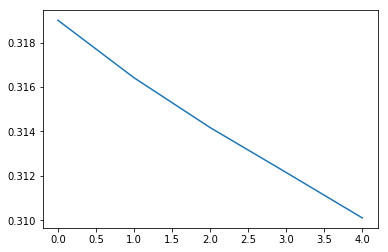

In [42]:
plt.plot(model.history.epoch, model.history.history['loss'])

In [65]:
print(model.evaluate(X_valid, y_valid))

499826/499826 [==============================] - 14s 27us/step
[0.3507917185782726, 0.8374954484165258]


In [170]:
deleted_substr = ['#', '<user>', '<url>']
dataset.create_train_test('../data/test_data.txt', '', delete_substr=deleted_substr, training=False, \
                          weight=0, stop_words=False)

Total lines (label = 1): 10000 0
10000 lines processed  len words 35   35
Set completed.
X_test shape: (10000, 128)


***

In [171]:
X_test = np.load('X_test.npy')
X_test = scaler.transform(X_test)

In [172]:
X_test.shape

(10000, 128)

In [173]:
pred = model.predict_classes(X_test)

In [174]:
pred[pred == 0] = -1

In [175]:
pred = pred.flatten()

In [176]:
create_csv_submission(range(1,10001), pred, 'output.csv')

### CNN

### Create test and train sets as word lists

In [3]:
delete_substr = ['#', '<user>', '<url>']
dataset.create_count('../data/train_pos_full.txt', delete_substr, True,0)
dataset.create_count('../data/train_neg_full.txt', delete_substr, False,0)


Total lines (label = True): 1250000
10000 lines processed
20000 lines processed
30000 lines processed
40000 lines processed
50000 lines processed
60000 lines processed
70000 lines processed
80000 lines processed
90000 lines processed
100000 lines processed
110000 lines processed
120000 lines processed
130000 lines processed
140000 lines processed
150000 lines processed
160000 lines processed
170000 lines processed
180000 lines processed
190000 lines processed
200000 lines processed
210000 lines processed
220000 lines processed
230000 lines processed
240000 lines processed
250000 lines processed
260000 lines processed
270000 lines processed
280000 lines processed
290000 lines processed
300000 lines processed
310000 lines processed
320000 lines processed
330000 lines processed
340000 lines processed
350000 lines processed
360000 lines processed
370000 lines processed
380000 lines processed
390000 lines processed
400000 lines processed
410000 lines processed
420000 lines processed
430000 

In [6]:
dataset.pos_count=np.load('pos_count.npy')
dataset.neg_count=np.load('neg_count.npy')

In [5]:
np.save('pos_count', dataset.pos_count)
np.save('neg_count', dataset.neg_count)

In [8]:
dataset.neg_count['believe']/dataset.pos_count['believe']

1.2881218274111674

In [4]:
deleted_substr = ['#', '<user>', '<url>']
dataset.create_train_test('../data/train_pos_full.txt', '../data/train_neg_full.txt', delete_substr=deleted_substr,\
                         training=True, cnn=True,weight=0, stop_words=True)

Total lines (): 1250000
10000 lines processed  len words 5
20000 lines processed  len words 1
30000 lines processed  len words 3
40000 lines processed  len words 1
50000 lines processed  len words 8
60000 lines processed  len words 3
70000 lines processed  len words 2
80000 lines processed  len words 1
90000 lines processed  len words 7
100000 lines processed  len words 5
110000 lines processed  len words 1
120000 lines processed  len words 3
130000 lines processed  len words 15
140000 lines processed  len words 4
150000 lines processed  len words 10
160000 lines processed  len words 14
170000 lines processed  len words 2
180000 lines processed  len words 3
190000 lines processed  len words 2
200000 lines processed  len words 1
210000 lines processed  len words 4
220000 lines processed  len words 4
230000 lines processed  len words 3
240000 lines processed  len words 5
250000 lines processed  len words 1
260000 lines processed  len words 3
270000 lines processed  len words 4
280000 lin

1010000 lines processed  len words 12
1020000 lines processed  len words 8
1030000 lines processed  len words 18
1040000 lines processed  len words 3
1050000 lines processed  len words 2
1060000 lines processed  len words 5
1070000 lines processed  len words 6
1080000 lines processed  len words 6
1090000 lines processed  len words 8
1100000 lines processed  len words 12
1110000 lines processed  len words 4
1120000 lines processed  len words 8
1130000 lines processed  len words 2
1140000 lines processed  len words 1
1150000 lines processed  len words 18
1160000 lines processed  len words 9
1170000 lines processed  len words 3
1180000 lines processed  len words 7
1190000 lines processed  len words 24
1200000 lines processed  len words 15
1210000 lines processed  len words 1
1220000 lines processed  len words 7
1230000 lines processed  len words 6
1240000 lines processed  len words 2
1250000 lines processed  len words 7
X_train shape: (2481774,)
y_train shape: (2481774,)


In [4]:
pos_count=np.load('pos_count.npy')
neg_count=np.load('neg_count.npy')

In [5]:
X_train_cnn = np.load('X_train_cnn.npy')

In [6]:
X_train_cnn_nn = np.load('X_train_cnn_notfiltered.npy')

In [7]:
X_train_cnn_nn[19]

['lot',
 'parts',
 'asia',
 '.',
 'especially',
 'rats',
 'live',
 'country',
 'live',
 'grains',
 '.',
 'supposed',
 'quite',
 'tasty',
 '.']

In [8]:
X_train_cnn[19]

['lot', 'parts', 'asia', 'rats', 'grains', 'supposed', 'quite']

In [9]:
y_train_cnn = np.load('y_train_cnn.npy')

In [10]:
dataset.X_test_cnn=[]
deleted_substr = ['#', '<user>', '<url>']
dataset.create_train_test('../data/test_data.txt', '', delete_substr=deleted_substr, training=False, \
                           cnn=True,weight=0, stop_words=True)

Total lines (): 10000
10000 lines processed  len words 15
X_test shape: (10000,)


In [11]:
X_test_cnn = np.load('X_test_cnn.npy')

### Tokenizing and creating embedding layer

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
EMBEDDING_DIM=128
MAX_SEQUENCE = 25

In [35]:
tokenizer = Tokenizer(num_words=len(word2vec.model.wv.vocab))
tokenizer.fit_on_texts(X_train_cnn)

In [36]:
sequences = tokenizer.texts_to_sequences(X_train_cnn)

In [37]:
train_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE)

In [27]:
X_test_cnn[8]

['friend', 'check', 'last', 'night']

In [38]:
sequences_test = tokenizer.texts_to_sequences(X_test_cnn)#test

In [39]:
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE)

In [ ]:
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE)

In [21]:
a=[len(line) for line in X_train_cnn]

In [33]:
k=0
for i in a:
    if i>25:
        #print(i)
        k+=1
k

1652

In [30]:
len(X_train_cnn)

2481774

In [31]:
word2vec.model.wv['sun']

array([-0.2997073 , -3.4053266 ,  0.6586034 ,  0.10876852, -1.0800909 ,
       -0.587479  ,  0.162335  ,  0.4341112 , -3.5035145 ,  2.6256943 ,
        2.5679784 , -1.1485934 , -0.869445  ,  0.33076155, -2.6989202 ,
        1.635172  ,  0.38823318, -0.2103089 ,  1.3687387 ,  1.9460928 ,
        0.9557114 ,  0.68311447, -2.8820393 ,  2.3169851 ,  0.09889784,
       -0.97738725, -0.52653605,  1.7866325 ,  0.35089108, -0.4611721 ,
       -1.0963752 ,  0.81630933, -2.5625348 , -0.83438087, -1.2803082 ,
        0.35769185,  0.8345404 ,  0.23801424,  0.4151234 ,  1.8253247 ,
       -2.7352335 , -0.42981854,  1.9408597 , -2.3048692 ,  0.57756096,
       -1.704978  ,  0.04113436, -1.682866  ,  0.8367453 ,  1.474126  ,
        0.7969587 ,  0.88935137, -0.9957703 , -1.1223384 ,  0.44031757,
        1.7102501 ,  0.24442361, -0.46114266,  0.3534821 ,  0.00846911,
        1.1793493 ,  1.6349734 , -2.7190626 ,  0.8958291 , -1.4428071 ,
        0.9977972 , -0.5164633 , -0.7470949 ,  0.33998314, -0.54

In [43]:
word_index = tokenizer.word_index
nb_words = max(len(word2vec.model.wv.vocab), len(word_index))+1

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in word2vec.model.wv.vocab:
        print(word)
        embedding_matrix[i] = word2vec.model.wv[word]
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

embedding_layer = Embedding(embedding_matrix.shape[0], # or len(word_index) + 1
                            embedding_matrix.shape[1], # or EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE,
                            trainable=False)

door
emeritus
taupe
shrine
clinicians
scripts
todaay
islamicus
manis
banging
fuu
humpday
semi-slit
combi
eka
niceone
tello
diary
tweetn
nv24hd
ulster
instruc
mds
thania
reallysad
eb
pcd
well-written
unable
jean-luc
probable
datee
liiiam
j.brothers
11.64-
tvdlove
graves
agreee
-1700-50
followmespeakingdeep
avery
simplylite
carefu
wannacry
desperately
chrissy
breton
enggstudent
acp
lavishly
sebab
x
wiper-slot
brassy
impro
unv
lyd
luminaries
spursnation
pb's
ironies
erotica
1948
deepest
13-19
4711
belvedere
1000hd
plumb
double-dip
aslong
climate
flipped
lpr
hotwheels
modelers
killem
jq
gems
bf's
bisi
wily
yewww
10x42
anti-inflammatory
drippin
tempting
amaya
hehehe
waheyy
v9
naimo
asik
behemoth
collectable
selects
reconsidering
good-looking
rufus
thatsmygirl
fb's
bellwether
larob
felt
hertfordshire
ballantine
amphitheatre
takamine
elephant's
talents
virgi
innuh
36-38
1ru
slaves
sche
famjam
3q
2:20
aldershot
axleless
stevie
anis
ancestors
cliffside
histoire
castlevania
hiking
isomil
shaded


11,000
gillies
paraphrasing
wilderness
seedling
ult
undiscovered
makapag
kiani
mababawasan
central
combed
9.95
fanz
curzon
trailers
grievous
swaggg
polycystic
builder's
ras
tpo
lysander's
11:50
authe
nikon's
bill
curity
mahe
shulerawards
outline
jamaica's
their's
colorfalls
zippo
thirty
licen
theawkwardmoment
8o
knothead
sleeepyyy
kartel
applause
buss
medical
greatly
hurt
gambler
abarth
octave
buh
12.10
emmy-winning
llc
wander
commercial
phalaenopsis
coukd
gravitational
grammy-winning
increase
bulgarian
21days
thunderbolts
developer's
nomention
sorryimnotsorry
digtal
saltine
balms
prong-set
teamjay
w
stlcards
lampur
09x26
poochne
colt
posi
woa
bummin
m-audio
jurisprudence
nyc
faggit
jamail
foodshouldtastegood
seton
raschel
syringe
camille
sondheim
xlrm
2take
installments
slateraddicts
damnit
tasted
go-anywhere
plzzz
convent
thejokesonyou
ankles
ccfc
1nri
slumping
muchmusic
guarana
neyo
2008-2011
tn450
thabk
redheads
bitxh
spiny
staystrongrach
4runner
mirabel
affraid
valli
musicality
ph

headache
fasttrack
culminating
bkt
smocked
believed
society
elective
strays
mh
infant's
survivor's
eastern
memento
ervin
nom
ifold
fox
mips
edyarisasheane
13x26
nayasexiestwomanalive
toothless
a-d
prety
sealing
childcare
ribb
multi-faceted
qing
delinquent
floridian
kermit
sequences
coverthenight
planned
structures
masama
durabook
redwall
southside
tampico
monopod
1267
thaielfsongforsj
yhea
isaias
ashe
consonant
libertines
nazirvuitton
1.99-
shma
ds3
unix
zoological
loveshot
mather
vague
smilies
wexford
jerdon
accor
imaa
beautyrest
deze
f-pin
swinger
miya
preys
gilaaa
lbc
dualit
challenged
tradi
dyinggg
ahe
systemax
jonathan
irregular
ty4
inputs
probiotic
mariska
thomasville
mouthed
fourteenth
stealin
lovin
wholegrain
hoodrats
neckline
cb325wn
7.6-
depends
senorita
5g
bodypump
enuff
guadalajara
10billion
snom
watchful
ap2300
reenact
frequency
clinician's
deserve
wreck
gyu's
eons
rc
zk
dvdrip
junsu's
lozenges
bahahaa
peepz
aeroplane
maiasaura
awesomes
paywall
tdm
headless
gilman
rapid-z


dig
2/8
headshot
sorrie
slaine
roadkill
ecclesiastical
enema
pasir
roomy
chlorine-free
11k
enid
custody
kilig
bacardi
splashed
loom
ipadholder
benz
replays
jmpe
triathlons
hhhaha
invisable
roommate's
sd750
slut
site
rosak
valarie
dollars
rotate
starved
exfoliating
ahlie
meets
jan
nmea
saying
2640
loveyoutoo
yuckkk
defiently
tonio
chronos
kream
koy
tarah
lisa
tonka
60m
06x10
hills
darkskin
softboxes
starfighter
d900afz
6.99
jillibean
exambusters
kokumaro
miw
waterproofs
17x27
jes
purest
wine
christain
declares
grocery
hermetics
pacer
30th
familyfirst
teamamg
shirt
shaking
wikis
nox
dragon
deezer
specie
smecommunity
genius
notebook
satori
bestkeptsecret
captiva
gullable
26-29
spaced
21-1
improve
attends
southbank
skewl
skylight
breading
eklind
bart
strdh
rattan
purpose
appalachians
sch-u
seamlessly
barbaro
newberry
3500n
27,28
savee
omgah
cpg
culture
bagal
jefferson
adve
theworstfeeling
12px
peniel
combinati
imagne
assy
direction's
antis
quarantined
fuckthehaters
remus
former
officejet
x

alpacas
whiten
selflove
byyye
cleaned
backcountry
napped
baggins
erked
monolights
600th
spectator
minn
lightheaded
richness
radically
thames
breasted
lily's
hokies
b30
suddenly
z560
pln
omgomgomgomg
waterworks
wifeyyy
nicko
walll
39.5
encountered
hund
newest
troubadour
get's
invissible
nl
longhair
xilai's
sagad
emoshh
uugghh
trc
mine
vaio
instantly
doubtful
seing
dote
sadnesss
cici's
berth
unbelievable
cross-shoulder
reusch
daley
goblets
nebula
sdk
creek
pre-loaded
illuminated
cringing
2:35
622
dna
shrines
self-cleaning
sylvie
ellsbury
creamette
nevergiveup
oodle
mybff
femalepains
dealio
torturing
neurons
zephyr
establishes
loveyoubaby
tortuga
factorfaked
leh
encompasses
persp
ecs
garnier
slta
biodegradable
unders
exploitation
truelove
favre
hexagonal
domo-kun
deargod
troubleee
founder's
bettet
wdyt
suncast
originall
corgi
1.don
titpic
hulk
bellarinas
250v
nv40
preservative
pamangkin
shortly
abed
pagans
pra
biztalk
48hrs
trafficking
linc
ling
boutique
pointlessnamedropping
tarndeeley
e

breeder
h6340
butthurt
not-too-distant
fes
familybiebermalleteisbeatiful
retells
creeping
legacy
marking
sphere
boycotting
14.7-
feverish
hungers
monkey's
11x17
activities
supersport
rini
cant't
loveyall
costly
fredy
suckks
jyjy
reef
btcstarmaker
b222mat
fiasco
motherfuckin
all-stars
implants
sudzz
emitters
distorted
gopunewarriors
rawrrr
agrarian
variant
sea-doo
lightskin
gonny
pyrex
18l
x-treme
myside
lol'ing
lindo
journa
guerilla
tex-mex
dorsal
topnotchhottiesthursday
cologne
guessin
silva
kaylah
nighht
malden
ganster
enfamil
sportsband
contested
sicc
gettysburg
wheats
axs
flurry
redefine
single-handedly
primarily
boymeetsworld
inti
jcr
tasik
hsv
assistan
regulating
tmwr
poem
lhhh
003b
snk
sweettweet
servo
ecolab
latly
trueconfessions
powerduo
java
regulator
velazquez
boils
errands
thur
winnie
thankgodforanotherday
chicago
wearemindless
dodgers
dickey
knowww
qistina
jolly
really-really
marti
undertand
mesoamerican
death's
alkhawaja
18.75
12x10
tippy
time-honored
frilly
6480w8
washe


cricinfo
funniness
nicd
upcoming
hardy
eonn
cmp-rated
lovelies
npt-m
essonne.image
beads
elementary
fuckouttahere
td611
efa
restricts
sup
iloveyoutoo
lundberg
besty
tvd's
idrc
soothers
9:13
brink
nothingtodo
aa
north's
bently
4.1-
heinemann
touted
7bb
irememberwhen
sacfree
sandwhich
fashooo
seemingly
write-once
viessmann
caddie
150ml
6:30
vg
alakh2011
improper
alb
unrealll
antispam
sdcz
rochdale
teachme
hubbell
hiw
6600ma
stefan
nen
coook
ika
lq
congestion
59silver
borrowing
03c
douglas
nan
potty
4t
irv
sand
aromatic
tx2
perfumed
modify
j250
migs
knitwear
chillmode
trenddd
970
dees
pretend-play
dreamcast
mj's
sacks
requested
fcuking
stripe
prescient
nguyen
echo
canons
1600
swaying
brat
pepe
16m
detecto
barcana
xt828
hisgirl
lavigne
flinging
yuum
cornelius
heartbreaking
responders
skateboa
keypads
shithole
tie-dye
proform
lilon
fermentation
1918
rejections
gr-d
8x
covington
5-40
7024133079
sob
tragedies
nutritional
mhi
164
elli
hypnotized
seafoam
doob
tantrik
6.9
aaa
300ft
shaves
paddli

hmph
diablo
reaction
eachother
superluv
mohon
tubs
magus
redu
bartite
freinds
nanny
one-piece
scot
14x5
mac
besides
reluctant
p200
l3000
saame
suucks
g2x
self-adhesive
motherboard
wus
gog
sirf
4x6
kembali
koren
daay
sawa
fainting
ffin
nutmeg
takeoff
woke
grape
3000t
cod
hapen
mountable
scarf
byrne's
bandai
scarecrows
hooping
crus
mcsteven's
evanescent
chasingthesunvideo
youss
transgendered
projecto
tittin
wallace
honky
enlarged
sd430
x31
35x
0.200
holli
presscon
sexc
dorms
blaming
notcomplaining
state-of-the-art
togo
society's
high-class
westview
7446
faith
se7520af2
xw
03x04
2omfs
mirrors
sadsadsad
hunter's
groundbreak
qube
anyways
bays
accident
6.6
malam
bongga
tcs
balsa
8k
chihuahua
poped
twittr
calligrapher's
spambots
dimitri
brixton
unplugged
owwhh
skillz
french-english
nfl
nadu
rita
asheville
49wh
defooo
sias
collizion
valuables
user's
bus
320
accomplis
thankkksss
drobocare
faced
haaappy
abrams
compilation
flanders
freakkin
curing
apologetics
guarded
alkaloids
natgeo
longoria
zoo

disfrute
poster
dyer
ehem
otcbb
bapbackwithpower
bridal
dsx
incessant
melted
yesi
mcas
oak
hahahhaah
r5family
medicated
giftpack
californias
biebergasm
strudel
8.7
freetime
doen't
toolate
stressing
gordons
moiii
383963-001
apricorn
sowwwie
closing
intrepid
sighz
roja
capping
sl-b
floated
windtunnel
affairs
heights
120mm
sely
waterman
yh
vanpire
nora
512mbx2
aroused
amanda
1284
balz
nighter
doctor's
infidel
salomon
0.750
delonghi
adjustment
tutu
se7500cw2
felon
150
barnes
foliage
giclee
8530p
justiin
cakewalk
upset
noteworthy
towers
beet
taxis
tener
drabble
pinkberry
suitab
gorda
budddy
s805
infectious
letsgomobile
bitchss
memes
codes
cramer
1939-1945
dontleaveme
airdrives
bighoops
dmc-fz
messaged
westmoreland
freakythingsiwoulddotoyou
megaupload
unwell
missis
embellished
advisory
re-add
addie
feww
bohemia
ohtay
skateboarders
nf
gentlemens
off-set
jetdirect
damsels
anthropological
3.13
c17
contracting
gph
babied
exami
cyber
fishnet
21.6
belleville
cheeky
poverty
dippy
howard
9108
kedai


spear
wan
shooottt
nannys
kyds
aniv
victimised
1995
a701
1008ha
sovereignty
meetoscar
formatted
saftey
0.003
assi
solidworks
beazley
chiara
wtaf
restrict
;p
2601
floridaa
mot
7742
rekon
m853
rainn
dual-link
dwlt
lr6
dpa
articulate
enjo
suski
robinsons
cryn
shaving
flowerbomb
sardines
edge
intestinal
idea
trendnets
constitutional
geothermal
tweetland
sowie
kwan
suakm
costs
tuner
importa
manage
ky265
p305d
cott
pex
catherine
creep
becauseitsthecup
load
unsettled
shmooze
step-by-step
plates
plead
faaast
park
nestle
tiring
judge
chungking
trap
moan
censor
faaavorite
hame
diffrence
generic
sprayer
must-see
phallic
burnett
resumed
lex
850
aussi
username
arc
untouchables
mmg
lari
nagkita
florida's
nothinq
tongan
assos
241c
ppg
solte
nipples
abused
popchips
beginnings
chancee
thechive
pinemeadow
onscreen
keyboardist
gdnite
i-na
641
slick
clinique
0.23
loooved
amptron
commercials
gnite
erv
downturn
propolis
0.281
closers
covenant
mazing
w.me
harvard
stinson
25,000
peterandremylife
forrr
naveed


brad's
increa
butty
outside
-2.8
biographical
countrymusic
0.194
whisked
folds
dietary
pull-on
fix
onl
togethe
heligoland
jonatic
tomyfuturehusband
firstworldprobs
limpin
secur
fitblog
holla
hi-resolution
x45
adder
iow
wooohh
prebike
actiontec
fuckinggg
karen
mollusk
225
able
ecotools
britishmahomies
ushering
giveup
utility
9.6
pitty
daybed
trynaa
zoom-nikkor
nubian
biloba
bangs
115v
sayinnn
retur
32.0
suspect
traumatizing
panoorin
thrush
shor
somtin
dirtier
swaggest
pleasent
rupaul
swine
dam
chic
restock
planing
reade
chelsee
precipitation
50ml
tallulah
teflist
mishap
stretchers
ping
bunfoot
sarry
c763
hypnotize
grinded
amali
0-11
enof
fpr
lithium-ion
fancychicks
diamete
crissy
grandmothers
c7786
nicaraguan
ulit
subsequent
cody
seabear
hitz
patch
fruitless
loveubeliebers
nitrile
left-hand
seperationanxiety
bidness
jared
discipleship
anyy
weatherrr
12pcs
slink
triquetra
occurs
cheapskate
spilled
os
c001
fatherless
craves
sats
bogota
moneys
app
acer
odeon
282
wto
vt
joshhh
namanya
juara

9.80
worked
candyy
ipad
739
sausalito
facilitate
nowandthen
coreldraw
where'd
versicolor
roll-up
subwoofers
fad
dell
s760gxm
communicators
ocr'd
lille
vacuum-arc
x22
design-petite
partying
l12
romaniawants1d
wuhan
7.5-
ahha
gangland
e-file
nonstick
lezzz
mem-ds
lazyone
ipods
iminlove
icey
patien
dopeness
supplied
kodo
lodger
bol
gifted
sickofit
offers
ince
tenant
kalman
bope
blending
tinkers
18x35
lullaby
boneyard
sweett
shoppping
v1
d'banj
clamped
procession
targ
daffodil
downrod
directioner
placenta
exile
jexy
fgr
embroide
cohen's
harvesting
audiocassette
turnout
jeweler's
littlee
isny
waring
dalmation
4150
outdoo
naima
lagii
hearthstone
rehearse
paci
setia
nayo
isuzu
7.0
torx
bell
polka
masterpiece
69th
existentialism
lesson
favori
40days
moll
rapp
notation
awon
mous
brk
appoint
hypnotist
yakima
compar
hotter
quint
can'tsayno
cayce
bookbag
mkasih
videofrom
sayingg
iphonealley
dr.paul
enchant
swindles
1h
4x7
elijah
francesco
repulse
innocent
savior
mindblown
okkk
melason
know's
mugs


haaard
gods
elysium
pitta
pluto's
tristeel
rz1700
ripstick
16x25
folk
novella
woofers
kelowna
estelle
enzymatic
linkin
syringe-type
longest
gilmore
greatday
friedrich's
snazzy
10.35
taut
flwbck
bard
quails
catholics
kilograms
manflu
mealtime
wholly
tiling
fridayreads
sleuth
vagina
creepier
specialty
hustler's
mommy-to-be
pda
pit
turrican
leadersh
scrapbooking
db
recliner
stumped
deuce
cultivate
storyy
floats
sadgirltweet
prom2012
857
soap
indian
ashy
4/12
2005-2011
8945
bulmers
gigaby
637
natural
taong
gellar
altus
brewers
multidisciplinary
case-mate's
extinguisher
shei
a18
07x17
looka
brent
ab-soul
comman
trading
dvrs
detachment
ughs
toni
aubree
dolomite
skatepark
buckwheat
o-rin
juniper's
burgers
vera
itl
xxii
cortisol
machspeed
bollinger
polish
fast-track
magyar
haisss
carnage
sugarworks
healy
quora
standard
asswednesday
punintended
standalone
boedker
tweetbox
woodall's
rhapsession
gtr
ex-g
2527
bormioli
lambda
kai
greetin
separationanxiety
flux
mem-i
fire
36c
phosphorus
gunmetal
gi

recieve
dawning
warehousing
tysonbreakfast
greatings
aluminized
blare
zur
wubb
veteran
stron
remover
judo
larf
aromas
impoverished
neutral
rock'n
ernest
geeet
moat
careful
quark
mmmhhh
deceased
gibby
reso
cubist
vulc
camelia
mylo
nthing
claret
picks
gavin
stoopid
easyread
5:30-
demonic
fisheye
caarly
ast's
viennese
wedushuaia
pdc
kiko
ufos
me1
ooppss
coffee-mate
pet's
bypassing
eitherrr
hostess
farther
maternal
cranston
corndog
waziristan
gamedev
earlobe
igave
fountain
faucet
6hours
pointe
60gb
charmer
insig
batsmen
drawbridge
dateee
0.005
tellz
neil
dontdoublemyrate
a8
heii
agents
5678
bernard
abdication
deloitte
pione
hahahhahahah
preface
doncasterisgreat
fleeting
debutante
despised
smelly
jolie
n201
peppersoup
grown-up
sharps
ts130
19x20
5.95
development
680
compatibility
freejeezy
yasss
wbez
cinnamon
04-07
voyager
anooo
saskatchewan
polyform
5oo
uxlondon
hawthorne
cfb
reproductio
um08a31
cobbled
-6.7
testt
hateyou
fate
19:00
1102
beco
providers
jeffrey
fairbanks
opi
super-plus
lady

carlin
halliwell
vibing
bradenton
e61
inglesina
suarez
dolphin
reasonsthatimsingle
broseph
wlovegreyson
hablo
zhoumi's
4you
pre-release
twr
divis
microfibre
galileo
realist
dnx
rideee
afterthought
lounging
shoppers
trutone
heart-to-heart
woodlands
mcgovern
return
milligram
clearwater
calendula
nmu
a7d
rotator
bb30
kreg
maxs
worn
cradle
keebler
colleague
dragonriders
intri
hume
mb
kersh
nurturing
a3300
ecoland
epicurus
dijon
boyfacts
ima
zell
kainis
experimenter
giler
asteroids
ts32gjf500
prawn
bubye
ultraportable
congratzz
barb-tite
reacher
alto
outch
skooba
samsu
carded
infor
hisgirlfriend
mdw
psychopath
bras
scents
ribbons
colores
fm26wh
takethat
3.29
runaway
eharmony
owe
lokeemoney
overdrive
redownload
econometric
1949
5700
cantrell
vibran
granulation
easte
vpr
pa3285u
zx6971
conclusion
glycol
willows
clamp-on
crawford's
cofee
sf
losi
futaba
tzu
omg
mts
delightful
sozza
p7000
12hours
lacquer
americana
07x09
meena
mone
mpc
5mw
956
nunavut
uggghhh
stoppp
remission
mattel
connectland
3

15/1
7/16
ufo's
winded
jawans
advised
horse
smarterchart
manlove
military
covent
11-11
pudgy
symphony
out-of-print
betterhalf
nu
stanky
dokay
frogs
taiwanese
xacti
dispersed
investiture
vo-toys
ood
accoustic
walters
dum
spoilsport
2-8
polar
tag-free
blowup
avant-garde
fairy-tale
theseee
sunda
salwar
22x27
thunderthighs
hayward's
payers
real-world
advance
flintstones
debra
ponds
cairns
danis
pratchett's
friendzonestories
512
peeler
huuurts
suzzicksthis
unexplored
jordann
x5eac
baptized
sisterchicks
ohmyyy
thou
revealed
kikkoman
doyou
iq
baaah
gt-r
aaagh
18x28
childr
coed
skeeter
binu
m18
naawa
sd4000is
wis
fictio
avid
maa
scarpetta
spotty
ck-nf
6.6-
ach
tryin
drc
earthquakes
kik
1644
mosby
scholastic
vill
seether
wearables
nuffn
regio
x-ray
wyeth
kyderby
312-06
puller
burny
reverb
soli
drink
rude
strokes
tattos
ax200
cotta
pittsburgh
visio
gopens
crusading
16v
bearpaw's
noschool
hiragana
arms
120421
carpen
shoulders
engelbreit
eilat
pouf
caramelized
xyron
psychopharmacology
contraceptiv

empowerment
extreme-performance
1943
spoilers
pronest
3x15
golder
apt
flutes
criminology
gonnafail
nagka-open
8120
winter's
charades
brea
lander
alfie
witout
badhabit
watery
question-and-answer
solicitor
ness
hosiery
ish
avond
midshipman
ajk
weal
gilgamesh
convenience
waisting
.
charlize
studios
flc
drugz
groovy
laos
9-1
dogged
10x19
daayyy
rapco
doubting
fending
africandad
targets
mfn
mflkit
directsyn
2x512
compelling
springfield
baffled
death-defying
landscape
caninum
cud
undertake
07x21
karli
misse
97-01
hateschool
solenoid
okicolor
tintin's
promptly
cockytweet
culmination
diode
1408
tetro
photograp
centur
dv6000
archer
grove
towels
25.00
hstnn-w
associatedfresh
detects
asiansontwitter
harap
black
censored
hemingway's
uppababy
omgoshh
demon
tdur
mule
ernesto
0.0641
badfeeling
patriots
thrust
ghoul's
non-laminated
cabinet
ahead
whcd
evoluti
concert
224
yo're
aminnn
jps
trueblueicamite
whuttt
waiit
withzinc
nagar
diba
zigzag
tricoat
frezzing
patwa
greet
egotistical
crocheting
maaf
whu

rashi
apollo
loubs
iomtt
cyberspace
gudnite
bergan
blck
mr-s-leather
jc
misbehave
adee
louisville
sm1
lithography
accessor
waan
smgt
elvish
villains
redemption
captivating
accelerating
precise
dionneonfridaydownload
twinz
rich
rode
seeev
nisha
cleef
bouquets
colds
troy's
tiap
sandwiches
luminary
indonesia's
positiveenergy
inden
010
coccyx
strained
wifi-ap
queenstown
cnn's
powershred
eryday
vacuum
culver
arrangement
beyonka
gifs
wid
eaden
whatareyousaying
trolling
regimented
nooothing
plucking
belafonte
thule
extremetech
kirk
chekhov
sisterss
voldemort
1899-1902
neighbour
7,005
everyman
babaaay
kx-ts
haynes
compounds
weehh
boondocks
hydor
firemen
arrh
fighter
louis
bakk
goodmorningworld
surfing
gorgoues
10thingsihate
chronicle
8040
engle
roids
daaang
apocrypha
elizabeti
d'aw
masssive
sandworms
referral
walls
sch-a
mitts
gis
menasha
correction
altering
fascinated
bloodied
3975
devs
1x793a00
soft-shell
nationals
volumetric
simulated
yard
brakes
___
miii
mamis
drumma
justinbieberinsmallzys

microtower
5-10
maaate
reproduc
equal
forgiveme
mabait
uhaul
durkee
kiln
cpm
stadium
kroger
classiques
johnathon
db25f
mookie
bestshowever
fits
hideaway
8mp
amps
kitchen
ieee
handsomeee
26026
rdr
migrated
sparta
alhamdulillah
open-world
holidays
ytv
limiter
14x36
prematurely
underestimated
candlewick
amiga
16950
unsubscribe
21-201-
l14
batting
givenchy
antoinette
freezing
wharf
less
loveu
azure
airforce
ex-chelsea
wrecking
award-win
smoking
usa-made
regrettably
laidback
poppy's
leni
redis
dumbarton
dvi-i
disturbing
bethlehem
resonator
yoyo
adonis
freaky
adapting
camelbak
takecare
sandoval
throughout
mangas
pray
interdependence
ultrabox
sifter
pouty
warship
incorrectly
oti-clens
mane
citrix
excuses
whimper
putters
maud
fluorosilicone
rocketpower
seniorstatus
bir
kimxi
winery
derailed
mads
terminally
shar
name
visor
400th
notready
raincoat
zhoumitangsday
sontag
fang
gold-n-hot
sumatran
philosophers
rumour
kayley
afp
ached
mildred
redirect
nigha
birdhouse
illustrate
rout
solly
15.2
bellet

vag
layla
tuna
lithographs
teamceltics
mechs
hot-blooded
tweetwatching
disappointments
uv600
eviction
baptist
dreamed
gauche
exxxzite
doobies
drylete
blurr
bilberry
knife
4xl
followher
greenland
icandoit
thanksrt
48
firearms
biol
bascon
200g
lem
samco
chex
cloutier
ugali
mbr
sd800
9x15
grabeee
stubbing
affordabl
graphs
bigest
b143mat
attaching
tylenol
allergy
kylie
civies
d20
alsooo
carefully
maksudnya
yet
scarred
fades
firstt
bistro
showw
whoreee
outperform
backwards
grinning
goanna
5ms
sgh-i
24t
quilted
danielle
m6000
yucatan
quench
bolan
22x22
systemic
justwondering
pumpeddd
solo
upside-down
1669
maniacs
hardrock
waverly
relatable
esteem
hhahahaha
complements
4100e
rockies
shite
voit
delmar's
favi
x-large
civilization
medium-duty
yahya
glimpses
8-6
shirred
holidaying
fuuuck
n7
9x18
wuv
bestfriendstatus
infopath
alllrighty
amend
slipit
produces
ripper
idontmind
jest
r
6303
playthrough
geographies
declassified
jeremy's
waveee
lolololol
juan
semin
girolamo
veryyy
gummi
0.625
redic
holi

vocations
bic
toystory3
carin
cooter
ryder
yeaps
slim-line
brooklyn
3ad
restaraunt
krispies
jokes
successive
cuckold
unorthodox
universities
chipping
ethiopian
concertos
penchant
bht
mowed
827
muchly
1876
danettes
hair
ended
4.41
abeh
wedgies
hallowed
basf
8.5
spirals
dawg
greendale
envi
6x11
psat
watchbuddy
btwww
ingrosso
benc
moors
bondhus
girrrl
shai
hatin
ravel
transl
lmfaaaooo
sombra
8cm
urgent
icee
creepin
500ma
bhaji
playaa
lelli
weng
sylvain
twisters
over-ear
skintone
website
hospeco
mybiggestfears
household
trackball
poh
reservoirs
lewis's
zattackers
shorttt
lovess
hendrickson
hodgson
mian
capit
duplo
mornight
12/16
net's
marikina
inspiron
koyo
headpiece
absinthe
uni's
t3
surprising
4our
haf
1450
birds
reve
rall
muthafuckers
2.65-
tooearly
baconator
ayer
heartwrenching
string
bleak
maju
reggeaton
organicville
fireee
g500
382
digi-pack
goona
krisallenonidol
compressor
thankyouellen
candleholder
glory
g72
heartbreak
espn's
='[
malvern
world-bank
heartbreaker
perhaps
wheneverr
nu

loser's
garminfone
contura
cutter
reframing
kisi
kalani
chaka
tiniearmy
ase
84622
unii
shayla
converted
bittersweet
araw
in-studio
6h
5590
copied
bwe
tf
hopefullyyy
mauritania
hebrew-english
heart-stopping
knoowww
resu
km900
schriften
truley
previewed
bee's
unglam
scandyna
zt
graff
tamika
hungover
geotechnical
clenching
teambarca
alpaca
hahaahah
nationwide
halen
lastnite
kampanyeunjujur
f365
jerker
veronica's
bawdy
27c
sprog
oclock
3100
dally
cd-roms
firstworldproblem
preeety
evol
beek
combatives
reels
productions
verael
maintained
idolise
tekno
slacks
demystifying
sparkly
lied
mems
mini-stereo
expected
17x36
lesly
nes
ciena
jewelfishy
wooaah
jennings
recogn
doublju
reinforces
clovis
chaperones
astronaut's
haier
on-screen
1960
adven
icbt
patented
establis
trololololol
slushies
contro
callme
dontletmedown
syntax
hing
vodafone
influence
sars
parallel
8220
ramz
lofts
aquarium
stillsick
geum
svp
kinilig
xl2000
8169
moslem
soggy
noti
degrading
tensile
bisto
procedural
blr
aristocats
tired
g

2700
paperport
ionizer
mahasiswa
mitsake
cigarette
tomarrow
mr1
aurum
r.d.millz
sendd
secluded
spake
condescending
four
followclub
littlesister
iwanttheboyfriendmusicvideo
groom's
kneed
ohgawd
database
parah
pupil
judge's
lugar
hawks
spica
subcribe
1942-2012
gentling
thompson
bird
stradivarius
harryyy
pregn
blackops
calorie-free
405
paa
metaphors
repub
hand-painted
g31
funkychunky
bellend
maaga
macrobiotic
repentant
edy
pbbtweets
leader's
yerp
ethan
bada
srx
accidently
cg7
miris
liamdoatwitcamwithalltheboys
shove
claimants
kuan
advantage
libido
catastrophic
434
dragging
sisal
fishnets
sgh-t
gur
rejuvenate
takers
rug
drop
flask
pg13release
12x27
wite
springform
sadness
dfc
waaah
holeee
ha40
brd
tk512k
mag
tct
canidae
bwechat
normalcy
transducer
cymbals
win
kidulthood
818
p5gpl
coauthor
ceremonial
angkor
wyclef
bulk
sonyeoshidae
tez
itsadirectionerthing
disappointing
engi
dwl-p
tongiht
boas
world-renowned
happs
wolverines
whisker
barbecue
mellowhigh
biased
gabby
bday's
seaside
spidey
sev

horticultural
4150cdn
hahhaah
euy
andrea
priyanka
oooft
yaff
julz
in-car
nips
6600m
v803
samurai
solerebels
su---wuut
kaka
makers
wasteddd
serba
2.12-
brimelow
veishea
holy
departs
happybirthdayoliverlance
firms
earphone
cojgg
a7l504
ga-p
cert
sabay
rafa's
clemson
niya
hathaway
872
diskeeper
wiped
anyon
flurries
patrick
references
dreamweaver
carstensen
d150
spay
teardrops
stoned
dim
bennys
2374
calabria
500s
1direction
breaching
tmrw
advantix
windex
eof
jenn
colegio
meizu
fwicki
ful
13.25-
horizon's
nomnom
integration
phsr
hotly
company-be
objects
celts
lineman
0px
title
aligned
mid-ride
apocalyptic
relaxing
acrylic
torrent
continents
intervention
prompt
conducted
banned
uncooked
balai
iaint
fractional
1830
canadensis
censorship
boredd
m550
9.75
e5400
energetics
testified
dahlia
bucs
f7
work
chintaly
techn
carboys
chomsky
yayayayyy
wiser
alway
2big
18-3
springcleaning
youur
pleeaase
yoouuu
whooops
rachele
citroen
table
complexities
kindergarten
tap-dictionary
gasped
gingerproblems
awe

merger
proj
henson
socia
wakaka
drugfree
contouring
ipkknd
ihateyou
hhm
analyzer
cheered
ecapants
excruciatingly
2.0
visine
arkon
pedialyte
showcasing
sihat
walnuts
margret
hsbc
grows
helms
japanes
xoxoxoxoxoxoxox
10-15
l'equipe
komputerbay
nw9440
hedlund
diamet
optiks
danceacademy
duro-med
lilly
doormat
obamadogrecipes
stairs
secondaryschoolmemories
front
hard-hitting
sibei
crit
aborting
surfactant
screenshot
nightmar
states
tetris
swimathon
threaded
3750
pandemic
benci
teac
gilad
thatsucks
au
capslock
dzogchen
syphon
bsb19thanniversary
yoou
vme
duhh
brandt
orz
blasts
4345930
soundcraft
lyrid
joby
originator
shunning
tdl
plummet
spit
generating
quess
doeee
cataloging
dampen
violins
criminals
self-portrait
zend
dodd-frank
treatment
sibuk
copa
19.8
similiar
8.6
agai
excursion
axsys
everbody
deeply
prox
short-term
wishicouldbethere
magister
tamron
benedictine
kilimanjaro
shinguard
reddd
bopping
chirstian
countries
stealthy
acl
owing
tudors
mic
prowl
33
bpm
g0od
icbm
inn
boozer
typo
seomo

helpme
photog
barbados
konica
gallery
aprender
ugandan
outspoken
2mw
shiittt
w5543
mono
newly
bareee
462
forgott
abi
tuppence
q9
drifts
shamee
macey
eleven
tightened
barrowlands
apparate
trotter
brands
oportos
obsession
yungen
paced
judaism
fantasea
kisss
dumbfuck
on-board
hennessey
6hrs
newlookbajanstyle
stomp
dyslexia
laterr
instrument
aikido
nations
three-inch
ramsey
abide
teamm
c4092a
tere
breakingdawn
favoritest
uce
abba's
lastnight
freque
blurgh
resourc
re-mastered
lightyear
insure
investigation
comprehensively
corinth
figh
bestsongever
ibm
ripple
gw2beta
fecked
305
oluwalatte
numer
eart
color
padilla
hysterically
qualifications
self-fusing
bulgur
minaudiere
khit
fort
natio
erect
960
resources
smyly
tico
0bk
ptt
hallo
bullshitters
mortise
prude
trousers
600g
prevailing
redbull
rsrs
sickie
wheee
sheeran's
joanie
nun
cve
throbbing
folaa
hang-up
curved-back
2312pk
poly-z
thisis
chala
matts
hid
hehhh
ascended
emi
buk
reconstruction
sust
betweenrpandreal
skyped
toasters
isimple
statue

cracked
crass
manua
transformer
2mara
o're
nouis
arina
fpm
kd
fiscal
sriracha
implements
bagpipes
yazi
recuerda
membe
unboxed
du
killinggg
embarass
05x13
slush
bridget's
shalimar
shittiest
giggle
clary
writter
privileges
n002
communists
91
01-3404-
rolodex
ene
litigation
1722
u___u
bby
echoing
caucasus
pricey
chalice
btown
vampyre
dachshunds
2120
tyrant
pgl
socal
aftie
946
grimshaw's
iphoneproblems
clothing
agra
jessup
wesleyan
apts
nobile
sadlyfe
v10
boink
jean-michel
smurfs
collectibles
tix
fern
blackberryproblems
d4f
enhancement
ngarepp
xx6
due
widest
battling
ryte
refereeing
sonicare
yipppeee
mapquest
glock
visors
dark
realquick
chocula
fllwback
lowepro
melina
rediff
detikcom
9gag
dred
polos
q5949a
thasss
greek-english
bfv
zoie
goodnyt
rbi
nobigdeal
croutons
noggin
birdbath
hudsons
submarine
thong
312-0279
poof
waterlox
shackled
chilln
ccc
steals
sun
skier
guess
jga
bettr
4x1gb
uptight
bb
donghae
tow
himachal
yuhhh
confirming
multi-layered
thirty-six
spectre
tecno
dv3
goodchoice
si

doherty
dyyying
boobies
perms
reflecting
cvem
hibernating
ultra-durable
auto-tune
andis
marabou
11x33
barclaycard
disciplines
phantom
readyyy
delive
stalwart
jessie's
austell
ceelo
weapon
jao
mooi
dipped
hebrew
wewantcoolmorning3
drinkn
begging
cotto
ex-broadway
stanton
mahn
ruth's
menta
utilization
itachi
21x
banged
leeper's
ifyoureallylikedme
1/24
logo's
holbrooke
adc
vitor
shopbop
uniquely
transmissions
profile
696
ex
openstack
7.75-
bigtime
alvin
jone
result
bayyy
nf-p
scran
namesake
loves
resorting
neutrals
leaders
meyer
isw
begun
sager
backplash
eyeballs
form
4o
air-o-swiss
ntky
queen
laramie
sturm's
duck
awakens
freemasonry
ford's
leann
jolokia
allende
heheee
divider
clair
streets
peyote
uber2012
masterpieces
7-10
elt
quake
plaster
multiplex
behave
plenum
bcpoli
vn
tinky
workhorses
0-5
yoyoyo
ginuwine
guerrilla
whiteboard
cartooning
k11i'm
u-form
fest
touchpc
sabuda
macally
shalinindia
2t
sensuality
dc's
michelle
bumbu
accusations
markup
erryday
7ta
r32
4096
18.25-
rockie
scrabb

serif
amendments
beeter
sharp's
rethinking
rted
674
mbabrooo
harman
eloquent
jara
cst's
democratization
condolence
wae
outfield
cooold
1872
crushable
1000base
startuptweetday
proces
zambales
newsroom
hows
ayatollah
alphonse
ramires
5019
re-assembled
arrays
sheckler
luxury
toxicodendron
marksman
surve
bolyai
wip
cappuccino
girlyy
reconcile
knooow
confiscate
1970s
budge
tripods
defendant
boyfreind
abes
woodson
olympiad
asr
believes
readddyyy
velvet
lin
j-b
lying
plak
ahahahaha
dongsaeng
kissies
23x31
self-paced
battersea
goddam
pleaseplease
superbetter
aa's
astronomer
screamers
explorer
imissyou
km4m
u1
leonard
baddream
8/
diet
jamacian
thirsties
blackman
dynamo
looveee
leader
switzerlandwants1d
disgruntled
countrymen
burch
youd
twix
hyb
ryan's
eraser
pacino
habitats
redeemed
5.25-
taha
blas
wudve
parameters
plleeassee
tommo's
fuck'em
likealways
yd623
keeneland
mascara
diamond-shaped
primer
smartphones
asot557
pick-me-up
traductor
conjunction
coolers
ziterdes
bik
tt
accen
gyn
freely
wcs


frnz
acquaint
reforming
spair
infl
comms
collision
abusive
randfish
pockets
clipper
milken
twent
pfav
nuance
pimped
grace
goundiet
lihh
kyou
weedon
reunited
zv5000
faithful
lifeboats
computerworld
hwa
skir
libary
procedures
leno
apk
taknak
rims
multiplier
prerequisite
gshit
ncte
ifound
firts
drinks
croquet
antrim
power
eqnz
beginnin
toxicity
582
ronpaul
na'night
shweet
eznsmart
pimp
easy-to-follow
suppp
winsh
maake
rayearth
day
catv
wideset
scanmaker
annotation
dela
collie
resume
swims
thank's
proclamation
effect
melville's
cms
bsnl
promdress
pushrods
liquitex
2658
27-30
parafamily
iconia
anatomy
followedback
virus
t'aime
t-rex
half's
summary
boogarlists
marquez
laz
behring
salons
daye
steal
survivor
puh-lease
rourke
iactually
accessed
v-tech
chachi
tilton
20ml
canterbury
relaxes
moder
2pm
u100x
pool
yeats
gnostic
subwaypaysitforward
lansky
however
adorablee
musiccc
memoriam
dinoco
greysonators
maki
shoutmeout
ornot
thankyougod
duplicates
avan
whyy
painfull
lagerfeld
nilang
cinemedia
o

bukas
alvita
hearr
lastma
florescent
rem
codependent
textsfromlastnight
_1
ruler
mushroom
mandi
hancock
uppercase
lamiglas
borin
become
koreas
falco
aegyo
5550nwmi
pu
22w
malaysian
constitutes
hace
watership
surgeries
tn1700
galerie
schoolboy
ribery
patsy
stoped
kirkspartythisthursday
txtn
dancemomsmiami
nytimes
gastos
darkover
60.000
extra-large
eastwick
f-type
lauder
scrutiny
errbody
sansa
j4
fgs
tdot
pthe
carbine
lonertweet
mwahh
kaz
agoynatic
colek
plunges
09.5
sanofi
recital
sustainable
bieber
suitcase
headpho
downloadable
weddin
volvo
2719
taco's
78th
fullness
snide
fabric
abuser
patchouli
20.00
65whr
simeon
91cm
icon's
nationalweedday
amreading
scoliosis
ne
enslaved
incorrect
creatively
1933
xxx-large
fujiilm
texasrangers
sadtruth
provides
samsung
somerset
understand
sisters
dali
olson
energy
incandescent
florentine
weree
fi
teamlilkim
etfs
representative
adtran
smokes
tica
tainted
pshhht
firm
skinny
responsive
goatee
yearss
uofa
wellers
refrigerators
weatherbeater
rafael
1000ml

siberia
songwriters
j'adore
deceiving
mead
bears
leavemealone
lambo
pedroia
microorganisms
laffy
agrib
letsgoo
ngucapin
canoeing
themself
playpen
bertrand
ipaq
nederland
7161658
jing
gayi
rolo
narrated
fogware
influential
delicous
extra-wide
youll
jean's
onsale
anissa
gonnah
teamdrizzy
40gb
miniver
tummys
sry
yukk
twifey
dou
f'd
crowns
toma
tyj
evian
convex
kid's
psalms
inme
high-profile
alltimelow
pre-thu
jocelyne
efron's
reproduced
putter
paged
marilynmonroeid
jamich
inherited
observance
24x36
ultra-soft
ifb
easi
whoooppp
cysticfibrosis
episode
europea
intelligent
gabriella
lets
machinists
motifs
uncorded
ban
fires
220
lana's
ohana
sudoku
feminism
sc-low
convoy
8.25-
lols
monogrammed
tantus
wakes
thng
kath
makee
ultralux
bwa
dare
donate
goodies
greetings
oer
bouillon
despit
athens
flexis
eleanor's
lukewarm
pacifier
gani
lossing
trump
checker
perahukertas
deke
twfanmiiy
fasttt
dm842a
norwood
5200mah
pacing
shuai
opbahrain
hp-compaq
kot
nkjv
mini
colette
yaaayy
eggyolkshirts
stupidscho

hix
fansigning
gait
giana
brezzy
hiswife
triptych
felines
goinn
thankyoulord
holey
krynn
vnc
pkg
condiment
tie-in
sutter
toots
rubicon
1946
1822
tuftop
lifetimes
landranger
aritzia
w8
hcl
pantry
catie
heart-warming
notthesame
plant
backround
4dvd
toiletpaperolls
offcial
giggity
1dshouldfollowdirectionersindonesia
tarkovsky
yds
ferris
casuals
selective
ttod
cliffsnotes
3.8-
dandelion
tamils
ty
robinson's
heeello
ticketed
unified
disne
32mx64
azerbaijani
860
d70s
opportunities
tumble
arund
miracle
x-pandable
compr
kaskade
popppin
)
pre-filter
ciyee
poo
crisp
eyetunes
plank
hank
teambisexual
henriksen
tricks
jamba
ballin
geometrica
satisfactory
arrangements
obs
klara
hooo
doyle's
exotic
fark
rod
intercultural
ocp
95whr
graduates
nxl
inspire
heli
407
6-7
time-saving
funnn
donahue
lee's
wheeled
conduct
tirade
trai
maia
cacia
beauitful
farewell
postnatal
ouut
sleevz
orchestrated
fur
barrymore
72mm
perve
walker
ahl
titled
distinctions
tanita
holder
rt'n
confortable
mirror-mirror
vials
spinste

debb
census
jebus
funtasma
2.13
quick-tie
45s
combustion
clemons
easier
roundabout
getoverit
craze
yalor
unlesss
guardian
iadmit
colson
patent
hydroponic
it'd
3.04
xj-a
patente
defos
suerte
gabe
161
dsl
neely
gargantuan
chatting
reprodu
xv6850
g's
haah
gustin
entity
loveyouxxx
anime
ba3
salicylic
izze
genui
gcsesiregrettaking
lobe
arabian
weary
nic's
1929
garnering
satire
elit
comeback
television
commme
1941-45
rdj
ulxp
randallstown
rpps
jor
kjv
gaa
maxam
tomm
mksih
blast
reliability
sawzall
theboss
timezone
emt
gundy
franciscos
employer's
golan
nortel
bamboozle
11x23
waqas
lineage
gingerness
malestrom
zae
255
shareee
simultaneously
thumper
falls
rejoicing
vegan
merchant
i2i
filigree
-0.7
fxcked
depicted
self-taught
clif
cheeses
dearoomf
pellet
ripples
lami
haikal
awwh
cxc
24,000
bourne
alec's
butler
south's
elf-vil
8x17
whipped
breast
overacting
perso
compartan
feline
0.012
ice-t
2885
cosmological
mcdermott
rmxs
stray
jager
bootable
wirewound
goodlove
jgak
bra
topfriend
michael
boron


qoin
mnu
whai
rainbows
accentuates
foreveeer
rockstar
ntc
liverpool
netserv
minds
fantas
appoints
badidea
delfy
499
kwame
xbr
aswc
desktops
bodyguardz
ti
foots
relle
chromakey
gora
6p6c
directionerslovelamping
illustration
binomial
cuddletime
5hours
administrator's
cuhh
iloveitwhen
canonical
munger
sociobiology
reecey
bankrupt
densha
niallto3million
cast-iron
homie
dreams
erasers
dials
contem
stalemate
peop
snap
whitty
quarry
hbz
jesuit
thehousingbubbleblog
naggy
engineers
fuckyou
errrgh
blinkstar
rotfl
full-hd
gonnadie
m645
connie
warmers
ramps
feasting
parrot
crimping
slaughtering
firewire
b110mat
dorang
shuuut
trademarked
basedworld
conductors
sm
toning
sacr
magn
powd
staggered
1893
dumbfounded
best-se
420love
papiss
1dtouroz
whatss
unsee
alota
200ppm
snippets
10-32
replacement
watcher's
gabardine
charg
toxicology
junkfood
remembrances
caballo
030
five-piece
fcblvie
wholeheartedly
brightest
beancurd
tipton
stand-alone
arthurs
laundered
zmafia
paral
marines
1.67
softbank
respective
p

board
roving
donovan
thid
naturalism
wilfred
sprinting
coolest
050
harts
hale
sandro
material
harrystyles
bustier
meeet
goku
bales
thicke
liscensed
150mbps
hypocritical
chiang
110l
takeaways
tumaro's
olivella
babs
booked
mc100
underwater
threats
dm's
4/18
ec3
129km
implemented
festool
11x30
assalammualaikum
definitly
rehabilitation
tds
ownership
tattoos
spurt
cummins
ashely
zd7269cl
california
kk266
blackberry's
penultimate
congratulations
9x472
embraced
coolflo
scent
13mm
observational
ronaldinho
polartec
deformities
cheeseburgers
pugh
researc
leathe
timings
zipfy
colitis
retain
4yrs
chipmunk
nerdproblems
8b
pilipinas
tobacco
longlasting
240
1997
4.expect
chana
rearing
halt
meno
yettt
metered
actio
happend
serial
avett
abstraction
fredericksburg
jacobs
rolls
241
oncore
superior
case-based
katies
ikno
willi
passwords
cunts
cottington's
thethingis
inge
overwork
pritty
breaks
unforgiven
cursive
e100
acclai
xx25
judith
curiousity
newair
cousinnn
logi
abigail's
retweet
rickys
audiobooks
bo

lazem
705
bosss
origins
gombe
greenhills
912
pdo
motherf
lister
chalky
nyfa
6.7-
926
drill
orange
zellie
impreza
first-quarter
thirstyy
beyondblessed
smilesss
imwaiting
dxck
visser
splunk
1-20
n40
gruppo
phrasing
strands
trippen
terps
theratherm
70af
nonverbal
studyy
lindor
kill
punched
aang
gord
49.5
marthaatstaples
houston
signum
75
worryin
resis
falar
joinery
bothhh
celiac
zaara
culo
electrocardiography
yuummm
_bot
censoring
cardboard
2628-2
peddler
depths
creators
7.625
hollys
desire
pizarro
powerbait
avg
aes
seeester
dog's
fastaff
tamrac's
yourwelcome
dune
clio
seaport
quantities
muslin
game-winner
10s
frikkin
369
carbo
haga
samia
in-channel
lovers
nowhere
marvell
ojt
rttt
mortars
trays
catch-up
zin
destination
kass
whatdoyouthink
283
beibs
cc641wn
twiitter
butnotreally
track-bed
prompted
burrito
aint
harrrd
nystce
stoneridge
sprinters
stilll
synthese
compliant
disappearances
salvatore's
lidge
presses
wowwee
ronda
wantedwednesday
m700
fasteners
styleboxwave's
replenishment
harassm

disoriented
exam
6360
copperfield
saluteee
shakira
grey
1000s
belden
realhiphop
snax
pivotal
followmeoliverlance
ewoo
jusst
paying
nw-s
long-life
zhu
tandem
1966
artin
1dvevo
3712
protec
occur
surfa
fiend
vega
mbp
tit
composing
elephants
spacejock
ilovelebanonbecause
z61t
18/4
drobo
everymorning
blondeee
xxxo
newswise
dishes--it's
jointed
j8
clarisonic
rancho
twinn
actuallly
chair
03
strawberrypicking
harwood
hercules
twitty
ananda
rainboot
aceto
yosi
sikee
hottness
itsfriday
niece
veterans
geomagnetic
oddest
3.00
swallowtail
1/16
in-one
brainwavz
mugabe
adelia
clinched
merseyside
shirtt
humboldt
logans
tbh
soconfused
referred
stovetop
pwned
schizophrenic
tactical
givingup
everclear
dre's
putin
048
wa7d
ash's
theywillloveme
titration
dolce
coo
dogma
300a
asiikk
nympho
starter
rima
noniii
militancy
dxmn
peter's
klux
mp826
itech
sashes
2011-12
anuschka
medialink
possib
thegame
snails
scented
smudges
filte
orgran
socialists
swords
hampir
searchdailynews
lexmark
riot
twittersphere
bothers


aynzli
507
dancemoms
googledrive
9gd
kez
happpyyy
colorstay
11/12
antioxidant
letsgohawks
retune
viggle
bicone
359
biden
transformations
shakti
shipper
allright
hilar
oonaman
variet
hahahahahahahahah
m-cube
budday
manufactures
sarapan
scars
peppermints
signed
salat
yey
records
cure
singed
maven
6600nah
ekor
oppa
day-to-day
tailor
u'v
recreated
maradonna
eyetv
reeds
washer
lexus
abroad
leggy
moshi's
mussini
traditions
tripplite
reinventing
flip-phone
wavering
hopes
hermit
undergraduate
cheesemonger
ides
fastforward
lihat
completeness
millennials
soldier
valje
mammoths
whyiloveyou
dual-core
playland
zeiss
lolas
flip-flop
prot
blackshot
high-potency
bieberfever
classiest
ironsky
confines
bethenny
33mm
iplay
wahlao
riley's
gnar
darkwar
m4w
headhunters
tendercare
srinagar
imaginext
recognising
overflows
bsm
honestly
goodnightworld
id
precocious
inclement
ifc-colombo-sri
appart
leek
8mins
jupiters
miky
7:33
1ml
05x33
sustaining
krens
soltek
jesse
oooh
revamped
bunso
boggling
09x12
nido
160gb

errgh
poisonous
inside-out
worldocscan
aryana
8.25
ayos
pacifica
13-16
queezy
goldy
university
shortbus
s0mething
jackdaw
screenflex
intentionally
pilots
99.9
f100fd
laylay
list
rvca
evelyn
weoo
electrical
hellblazer
commentating
underaged
cav
inspiration
bonuses
iodine
goatskin
6:12
weeeh
uggg
gunsmithing
scare
adoption
boater
hooper
marylou
your're
whiplash
peach
trully
weh
thatsmyboy
scotch
g510f
e35
hem
income
ridiculous
uff
longg
biobag
bulb
paramdam
hufflepuff
sleepy
chasity
sadia
summarized
bfflove
sweettt
ilink
walkfit
kumin
clipless
f0993
fashionstar
thornes
woolly
skyline
13millionswifties
assassination
hake
nous
siaa
aubrey-maturin
pq
2004-2008
muchooo
easy-to-learn
12/24
sanam
fizz
janay
teamchristine
tew
functions
sunsilk
06/05
tolstoy
psht
canadia
whea
mitchell
fuken
nomakeup
kpoptv
nostromo
sometimeee
chuby
nqm
djsparktookoveramberstwitter
afgelopen
funnyy
racehorse
td612
playoff-bound
lamar
replying
25.5
c30
dru
bala
troopers
rope
thnaks
hauser
caps
caprisuns
tambah
omm

powertools
walkthrough
besto
turntable
soavo
musketeers
debacle
gerbil
ancestral
nell
drs
thatss
singleness
dsls
barfed
olb
watchin
waitlist
khs
momz
smartcookie
cek
1207
frn
hesse
spaceship
subversive
sensation
alcoholism
cybernetic
ripbelieberyadhu
75a
gottaloveher
scrumptious
bestrong
synthetic
aaahw
soynuts
relaxation
intricate
seizing
refrence
wtbs
insures
griddle
grower
aladdin
dads
dx263006
mediaeval
pessimist
3255bl
arias
financial
nvq
besst
wheater's
10x14
openfollowpro
bez
raising
characterisation
omgpop
uncles
kelso
7x
arsenicum
emissions
plagiarism
developers
marshalltown
fothermucker
clipp
bellagio
someon
muahahah
wipes
arrr
enroute
aerod
masterkraft
inuit
khakis
10x36
bioactive
harrigan
smaller
merlin's
lmfaao
crepes
don''t
energic
contestants
courtly
2gfx
stimulated
braa
jarang
lww
novacane
pallet
52100
08x16
pawpaw
villeroy
bitdefender
at1200
aigooo
upb
1988-1999
jeddah
plato's
umh
dbj
1891
rezo
timberwolves
kaaay
larger
compos
offences
init
worldview
7,100
32mx72
m2000

fisher
revea
fancicon
kirb
acme
stress
yipeee
aetrex
moscow
02k6513
11x19
maggs
squeaky
patriot
axzo
notime
tonys
c19
drain
musicflow
technol
meteor
bahahahahahaha
-6.5
raisin
cements
mathew
boiron
stunned
pureview
1.69-
eachothers
bygone
rx3715
dispatched
ehn
anderlecht
polymers
bello
kruger
lines
raccoon
12x26
y'll
laggy
16-1
overloaded
geophysical
olajuwon
jokee
sif12
rover
framers
kanu
kraken
dairy-free
agt
partaaayyy
emb
chosun
aseeek
yummyinmytummy
grating
haddon
hepi
yaoi
garri
kenilworth
intend
flavah
seamstress
eagan
goers
1836
aiken
biblica
insecurities
robin
sales
ms_loops
nawwh
on-orbit
60ft
egberts
in1
virginia's
mamu
overthrow
grimoire
r40e
wfc
stances
gibb's
cga
physicians
accredited
pearstone
9671
climalite
itsabouttime
team-mates
weather-resistant
ahw
remember's
nawww
specialties
geoff
gae
volunteers
myrrh
wiz
spect
12,000
blight
ryland
disease
publish
off-white
insignia
heeeh
vero
columbine
hahahhahaahhahahahahahahahahahahahahahahahahahahahha
motion
drake
yorke
texes


reverse
shlong
worshiping
s1ep6
campus
peckish
greatmood
settee
nfc-enabled
ketik
homeworkkk
dewberry
badtimes
wolford
finlay
whorl
stareast
youtubers
cavendish
letsgooo
pezza
kdb
semangaaat
echinacea
+
waltham
myy
441
gigabyt
wwt
sobeys
kit
bulsa
documenta
jyp
botan
buzzing
gmn
juu
entrepreneurs
20minutes
package
caant
2662
nuns
0.344
flashganggogetters
cbl
open-source
pocketbook
chibi
dearly
csr
c250
cryingmyselftosleep
ainun
fixed-mount
ald
ensuring
rihannanavy
ii
e250
3020
approxim
kookieday
padholder
favoritesong
3ffx
hoe
apnea
okaaay
scruggs
89-94
gathering
98.5
melitta
baskervilles
golite
fllwed
980-0005
basie
561
nurtured
ruislip
awg
kumpul
pum
wiper
a-tech
soild
okey
lefreak
275fd17f
k7s3
off-broadway
doctrines
clogs
introdu
straig
kyuevilquotes
hiring
gudmornin
girlfrienddd
ggs
whopped
b334mat
hookup
loans
mpls
winterberry
red-haired
compassion
q
texa
muesli
arguments
fandom
ppx
unfortunetly
surf's
3000-4000
lamont
biasa
proglide
machinist
soong
printing
u-haul
alanna
austral

ceeebs
rgiii
derm
stewardship
huuurt
tagd
treasures
friendzoned
gemini
twitterfriends
featherweight
application
muahh
blamed
rosy
thanxz
sessions
fat-free
reliable
heisman
mechtanium
pierson
zero-g
thirstday
bbz
hu16
avi
mako
deep-woods
18awg
ohyeahhh
contrast
funfact
lrlr
larson's
mutch
overrun
mx6000
listo
mony
kanya
releas
highschoolmemories
lovemyl
4dpa
liamfollow
contribution
carls
brogan
millionpounddrop
dianetics
reaallyy
damnn
rascal
elitegro
undertaker
etudes
shazza
+4.00
matagal
lam
taxonomy
rejoin
soorrryy
communion
sensitiv
badgemates
critically-acclaimed
edger
limitations
mosiac
enc
baseball
trus
luxuriou
restructured
douchebags
geograph
tan
lauded
rosen
chiefly
menthol
syrians
ayn
ace
1dsongconcept
fatale
smuggler
aod
gotye
distribu
enamel
roarin
drools
rigger
blunderbuss
troubling
blur
demoralized
haddad
fiber
swatches
seville
sistaaa
aircraf
morni
airhead
exept
14kt
03x36
unforgettable
superstars
ai
babygrow
ronco
menagerie
dropbox
hmmph
bertolt
afrobeats
ivan
maybeee
b

vlogging
estrada
tumors
1116
bering
barber
jaa
309
54g
saunders
7months
gromit
sedins
quietly
mickie
digita
mahal
sconce
traveled
buckle
pld
expanded
flapjacks
25k
jpp
adds
biddie
prognosis
lamo
racks
nard
shirakiku
shopper's
cuter
backs
candida
chants
ferrite
waddesdon
biitch
gampang
harl
retweets
miraculously
pfb
pickled
yougetmajorpointsifyou
abercrombie
feet
travertine
sluttt
decorates
litrally
lamlam
2many
trad
flies
brewer
scape
rv
montez
teambowtie
petroglyphs
runny
pmp
tatts
catastrophe
uberfacts
rayer
makinn
14x35
timeoff
rota
iza
projecting
c4096a
cerelac
chandlers
10.15
funkadelic
kaam
deft
sindhi
godiswatchingyou
eewww
beautifu
limme
figurines
essen
humm
hardest
fetishes
rebirth
superlative
hahahhahah
drive-by
mwc
minoru
okayee
aperture
tamagotchi
goddd
pints
ezi
uninitiated
twitterfam
14.8
css
gloat
evacuation
roadtrips
elicia
100m
frenchmahomie
rebuilt
bison
mki
institution
084
thailand's
conga
7671
devora
campy
43kg
temptation
retailer
valens
sohyun
yesyesyesyes
advice
r

o'connell
topeak
weatherfx
waikiki
micca
kimax
paiiin
staymindless
wrkout
5.29
mct
tv9
sa
shatter
joor
whocares
2000xpvista
zapennin
intuitive
ys
disciples
basque
auditorium
cayenne
21x31
kearney
playdough
lychee
navigating
denny's
ingle
adorkable
1903
melachi
jinxing
tthat
goodwin
realtime
ou
spiri
grimm's
ahhahahaha
lp
toast
xtra
sniping
bike
psmith
dunhill
excerpts
transient
lyman
cary
nflpicks
2720
quickness
retrolink
leamington
teamcobro
lipton
bottled
salsa.jewel
cosmopolitan
allegorical
collegeproblems
current
haj
ttm
sunni
dolman
vouchers
depictions
oneiric
sucks
kisumu
bluechart
corse
courthouse
revit
ribbo
offensive
hknow
companies
neeed
chloes
02w
morninqq
mid-size
pianists
indianapolis
gooodd
byebye
04/28
ialwayswonderif
grapeseed
steelersnation
sparty's
nexon
faiscorrupt
forests
partaaay
quebec
imposible
effs
blair
shariah
tanks
distr
contemplative
price
issh
virginian
windscreen
nuva
rna
thnks
newington
encloses
familyhistory
modest
30g
effecti
mit
maps-usa
qr
biggestturn

lick
bee
x-pert
evolutio
hanna's
goulding
gute
bigger
teamawesome
aimi
wiiish
enjoi
hicolor
redbulls
foldable
sigs
comeee
vibrated
anarchists
expr
petroleum
lagunya
phillippe
thanx
minidisc
limericks
errything
teh
proxy
x39
cuuuttteee
q6470a
fcken
majesty
dopod
rollerball
girdle
07x16
fallacy
fargo
hx2415
bass
carryi
9ce
molar
lch
firsttime
hdcd
09.0
coolll
sgh-a
juneiscodysmonth
lifter
905
prince
sd
prego
northampton
_
sizzling
riches
fosho
fundamentally
ohaha
sparkin
ravioli
sugat
fashi
bastion
chennairental
metric
unicef
suez
whatchuu
magik
seesters
ajax
4x8
contents
9l
flagged
eastbound
overpowering
mames
hi-hat
xvi
whore
3-3
miah
mackie
backatcha
pops
gp
catholicism
a100
destinations
vineyards
kick-off
merp
cuttie
freakonomics
carpenters
indigo
kaskus
forsaken
weehhh
wanan
grain
leading
smone
flu
ghds
07x15
freefall
anthol
repose
myslef
bucks
cuti
onetime
stilton
confederacy
conn
curry
contingency
roxas
hdr-fx
jealously
thereafter
dissolving
immortalis
mislead
sleepwalkers
coordin

### Building CNN model

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y_train_cnn, test_size=0.2, random_state=23)

In [46]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

model_cnn = Sequential()
model_cnn.add(embedding_layer)
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv1D(300, 3, padding='valid',activation='relu',strides=2))
model_cnn.add(Conv1D(150, 3, padding='valid',activation='relu',strides=2))
model_cnn.add(Conv1D(75, 3, padding='valid',activation='relu',strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(150,activation='sigmoid'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1,activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [82]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 128)           12622080  
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 128)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 7, 300)            115500    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 3, 150)            135150    
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 1, 75)             33825     
_________________________________________________________________
flatten_6 (Flatten)          (None, 75)                0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 75)                0         
__________

In [73]:
model_cnn.fit(X_train, y_train, epochs=1, batch_size=128)
print(model_cnn.evaluate(X_valid, y_valid))

Epoch 1/1
500000/500000 [==============================] - 27s 53us/step
[0.3756699903049469, 0.823716]


In [71]:
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=1, batch_size=128)
print(model_cnn.evaluate(X_valid_cnn, y_valid_cnn))

Epoch 1/1
1287552/2000000 [==================>...........] - ETA: 1:11 - loss: 0.4551 - acc: 0.7915

KeyboardInterrupt: 

## model_1

In [47]:
model_1 = Sequential()
model_1.add(embedding_layer)
model_1.add(Conv1D(250,5,padding='valid',activation='relu',strides=1))
model_1.add(GlobalMaxPooling1D())
model_1.add(Dense(250))
model_1.add(Dropout(0.2))
model_1.add(Activation('relu'))
model_1.add(Dense(1))
model_1.add(Activation('sigmoid'))
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           25341056  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 21, 250)           160250    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
__________

In [48]:
model_1.fit(X_train, y_train,  validation_split=0.1, epochs=5, shuffle=True, verbose=1,batch_size=128)

Train on 1786877 samples, validate on 198542 samples
Epoch 1/5
1786877/1786877 [==============================] - 391s 219us/step - loss: 0.4109 - acc: 0.8045 - val_loss: 0.3964 - val_acc: 0.8124
Epoch 2/5
 978560/1786877 [===============>..............] - ETA: 2:59 - loss: 0.3945 - acc: 0.8140

KeyboardInterrupt: 

In [38]:
model_1.fit(X_train, y_train,  validation_split=0.1, epochs=5, shuffle=True, verbose=1,batch_size=128)

Train on 1800000 samples, validate on 200000 samples
Epoch 1/5
1800000/1800000 [==============================] - 216s 120us/step - loss: 0.4050 - acc: 0.8080 - val_loss: 0.3944 - val_acc: 0.8123
Epoch 2/5
1800000/1800000 [==============================] - 229s 127us/step - loss: 0.3849 - acc: 0.8197 - val_loss: 0.3865 - val_acc: 0.8169
Epoch 3/5
1800000/1800000 [==============================] - 234s 130us/step - loss: 0.3756 - acc: 0.8243 - val_loss: 0.3846 - val_acc: 0.8198
Epoch 4/5
 288384/1800000 [===>..........................] - ETA: 3:16 - loss: 0.3654 - acc: 0.8291

KeyboardInterrupt: 

In [275]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y_train_cnn, test_size=0.3, random_state=90)

In [49]:
from keras.layers.merge import concatenate
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
conv_filters = 128

inp = Input(shape=(X_train.shape[1],))
emb = embedding_layer(inp)

conv1_1 = Conv1D(filters=conv_filters, kernel_size=3)(emb)
btch1_1 = BatchNormalization()(conv1_1)
drp1_1  = Dropout(0.5)(btch1_1)
actv1_1 = Activation('relu')(drp1_1)
glmp1_1 = GlobalMaxPooling1D()(actv1_1)

conv1_2 = Conv1D(filters=conv_filters, kernel_size=4)(emb)
btch1_2 = BatchNormalization()(conv1_2)
drp1_2  = Dropout(0.5)(btch1_2)
actv1_2 = Activation('relu')(drp1_2)
glmp1_2 = GlobalMaxPooling1D()(actv1_2)

###conv1_3 = Conv1D(filters=conv_filters, kernel_size=5)(emb)
###btch1_3 = BatchNormalization()(conv1_3)
###drp1_3  = Dropout(0.2)(btch1_3)
##actv1_3 = Activation('relu')(drp1_3)
##glmp1_3 = GlobalMaxPooling1D()(actv1_3)###

# Gather all convolution layers
cnct = concatenate([glmp1_1, glmp1_2], axis=1)
drp1 = Dropout(0.5)(cnct)

dns1  = Dense(32, activation='relu')(drp1)
btch1 = BatchNormalization()(dns1)
drp2  = Dropout(0.4)(btch1)

out = Dense(1, activation='sigmoid')(drp2)
model = Model(inputs=inp, outputs=out)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 128)      25341056    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 23, 128)      49280       embedding_1[2][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 22, 128)      65664       embedding_1[2][0]                
__________________________________________________________________________________________________
batch_norm

In [50]:
model.fit(X_train, y_train,  validation_split=0.1, epochs=4, shuffle=True, verbose=1,batch_size=256)

Train on 1786877 samples, validate on 198542 samples
Epoch 1/4
1786877/1786877 [==============================] - 564s 315us/step - loss: 0.4470 - acc: 0.7848 - val_loss: 0.4237 - val_acc: 0.8026
Epoch 2/4
 902912/1786877 [==============>...............] - ETA: 4:40 - loss: 0.4268 - acc: 0.7973

KeyboardInterrupt: 

In [277]:
model.fit(X_train, y_train,  validation_split=0.1, epochs=4, shuffle=True, verbose=1,batch_size=256)

Train on 1575000 samples, validate on 175000 samples
Epoch 1/4
1575000/1575000 [==============================] - 404s 257us/step - loss: 0.4308 - acc: 0.7915 - val_loss: 0.3982 - val_acc: 0.8150
Epoch 2/4
1575000/1575000 [==============================] - 405s 257us/step - loss: 0.3998 - acc: 0.8114 - val_loss: 0.3849 - val_acc: 0.8218
Epoch 3/4
1575000/1575000 [==============================] - 367s 233us/step - loss: 0.3924 - acc: 0.8158 - val_loss: 0.3802 - val_acc: 0.8251
Epoch 4/4
1575000/1575000 [==============================] - 402s 255us/step - loss: 0.3877 - acc: 0.8185 - val_loss: 0.3761 - val_acc: 0.8267


In [278]:
model.fit(X_train, y_train,  validation_split=0.1, epochs=4, shuffle=True, verbose=1,batch_size=256)

Train on 1575000 samples, validate on 175000 samples
Epoch 1/4
1575000/1575000 [==============================] - 394s 250us/step - loss: 0.3844 - acc: 0.8204 - val_loss: 0.3729 - val_acc: 0.8281
Epoch 2/4
1575000/1575000 [==============================] - 413s 262us/step - loss: 0.3824 - acc: 0.8219 - val_loss: 0.3691 - val_acc: 0.8299
Epoch 3/4
1575000/1575000 [==============================] - 398s 253us/step - loss: 0.3799 - acc: 0.8230 - val_loss: 0.3670 - val_acc: 0.8302
Epoch 4/4
1575000/1575000 [==============================] - 402s 255us/step - loss: 0.3779 - acc: 0.8243 - val_loss: 0.3653 - val_acc: 0.8321


In [280]:
model.fit(X_train, y_train,  validation_split=0.1, epochs=4, shuffle=True, verbose=1,batch_size=256)

Train on 1575000 samples, validate on 175000 samples
Epoch 1/4
1575000/1575000 [==============================] - 366s 233us/step - loss: 0.3768 - acc: 0.8248 - val_loss: 0.3649 - val_acc: 0.8327
Epoch 2/4
1575000/1575000 [==============================] - 407s 259us/step - loss: 0.3754 - acc: 0.8257 - val_loss: 0.3633 - val_acc: 0.8329
Epoch 3/4
 767744/1575000 [=============>................] - ETA: 3:41 - loss: 0.3735 - acc: 0.8264

KeyboardInterrupt: 

In [292]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y_train_cnn, test_size=0.2, random_state=23)

In [44]:
from keras.layers.merge import concatenate
from keras.models import Model

conv_filters = 128

inp = Input(shape=(X_train.shape[1],))
emb = embedding_layer(inp)

conv1_1 = Conv1D(filters=conv_filters, kernel_size=3)(emb)
btch1_1 = BatchNormalization()(conv1_1)
drp1_1  = Dropout(0.2)(btch1_1)
actv1_1 = Activation('relu')(drp1_1)
glmp1_1 = GlobalMaxPooling1D()(actv1_1)

conv1_2 = Conv1D(filters=conv_filters, kernel_size=4)(emb)
btch1_2 = BatchNormalization()(conv1_2)
drp1_2  = Dropout(0.2)(btch1_2)
actv1_2 = Activation('relu')(drp1_2)
glmp1_2 = GlobalMaxPooling1D()(actv1_2)

# Gather all convolution layers
cnct = concatenate([glmp1_1, glmp1_2], axis=1)
drp1 = Dropout(0.2)(cnct)

dns1  = Dense(32, activation='relu')(drp1)
btch1 = BatchNormalization()(dns1)
drp2  = Dropout(0.2)(btch1)

out = Dense(1, activation='sigmoid')(drp2)
model2 = Model(inputs=inp, outputs=out)
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 15, 128)      12622080    input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 13, 128)      49280       embedding_1[5][0]                
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 12, 128)      65664       embedding_1[5][0]                
__________________________________________________________________________________________________
batch_norm

In [47]:
model2.fit(X_train, y_t rain,  validation_split=0.1, epochs=4, shuffle=True, verbose=1,batch_size=128)

Train on 1800000 samples, validate on 200000 samples
Epoch 1/4
1800000/1800000 [==============================] - 347s 193us/step - loss: 0.4199 - acc: 0.7992 - val_loss: 0.3969 - val_acc: 0.8117
Epoch 2/4
1800000/1800000 [==============================] - 347s 193us/step - loss: 0.4012 - acc: 0.8108 - val_loss: 0.3904 - val_acc: 0.8157
Epoch 3/4
1800000/1800000 [==============================] - 316s 176us/step - loss: 0.3952 - acc: 0.8143 - val_loss: 0.3858 - val_acc: 0.8188
Epoch 4/4
1800000/1800000 [==============================] - 319s 177us/step - loss: 0.3908 - acc: 0.8166 - val_loss: 0.3833 - val_acc: 0.8193


In [279]:
print(model.evaluate(X_valid, y_valid))


750000/750000 [==============================] - 104s 138us/step
[0.36414138265864054, 0.8322173333333334]


In [135]:
model_1.fit(X_train_cnn, y_train_cnn, epochs=2, batch_size=128)
print(model_1.evaluate(X_valid_cnn, y_valid_cnn))
model_1.fit(X_train_cnn, y_train_cnn, epochs=2, batch_size=128)
print(model_1.evaluate(X_valid_cnn, y_valid_cnn))
model_1.fit(X_train_cnn, y_train_cnn, epochs=2, batch_size=128)
print(model_1.evaluate(X_valid_cnn, y_valid_cnn))

Epoch 1/2
2000000/2000000 [==============================] - 1443s 721us/step - loss: 0.3582 - acc: 0.8339
Epoch 2/2
500000/500000 [==============================] - 86s 172us/step
[0.35488605129241946, 0.836024]
Epoch 1/2
2000000/2000000 [==============================] - 1348s 674us/step - loss: 0.3427 - acc: 0.8426
Epoch 2/2
500000/500000 [==============================] - 111s 222us/step
[0.35018599667549133, 0.838626]
Epoch 1/2
2000000/2000000 [==============================] - 1361s 680us/step - loss: 0.3342 - acc: 0.8470
Epoch 2/2
500000/500000 [==============================] - 111s 223us/step
[0.34750774543094637, 0.840164]


In [136]:
model_1.fit(X_train_cnn, y_train_cnn, epochs=3, batch_size=128)
print(model_1.evaluate(X_valid_cnn, y_valid_cnn))

Epoch 1/3
2000000/2000000 [==============================] - 1420s 710us/step - loss: 0.3282 - acc: 0.8501
Epoch 2/3
2000000/2000000 [==============================] - 1401s 700us/step - loss: 0.3257 - acc: 0.8514
Epoch 3/3
500000/500000 [==============================] - 111s 221us/step
[0.3500089332289696, 0.839646]


In [137]:
model_1.fit(X_train_cnn, y_train_cnn, epochs=1, batch_size=128)
print(model_1.evaluate(X_valid_cnn, y_valid_cnn))

Epoch 1/1
500000/500000 [==============================] - 120s 241us/step
[0.3531978946862221, 0.839124]


In [85]:
print(model_1.evaluate(X_valid_cnn, y_valid_cnn))

500000/500000 [==============================] - 20s 40us/step
[0.35779198217821123, 0.835468]


In [139]:
pred = model_1.predict_classes(test_data)

pred[pred == 0] = -1

pred = pred.flatten()

create_csv_submission(range(1,10001), pred, 'output.csv')